# ProduceFalseColourGeotiffs

**What does this notebook do?** This notebooks demonstrates how you can call an external set of python functions into a Jupyter Notebook, rather than loading them all explicitly within the notebook cells. This streamlines the notebook, and makes it a lot easier to read the code. This notebook uses two python files: `DEAPlotting` and `DEADataHandling`, both of which are also available to download. The notebook develops a query and extracts some data using the `DEADataHandling.load_nbart` function. It then plots up a false colour image and saves it as a Geotiff using the `DEAPlotting` functions.


**Date** March 2018

**Author** Claire Krause

**Tags** 

# This is the bit that allows you to call in a stand alone python file. 

The two python files `DEAPlotting.py` and `DEADataHandling.py` are both sitting in the `algorithms` folder.

In [1]:
% pylab notebook

import sys
import os
sys.path.append(os.path.abspath('/g/data/r78/cek156/dea-notebooks/algorithms'))
import DEAPlotting
import DEADataHandling

# Now just some regular module imports
from datacube import Datacube
from datetime import datetime

dc = Datacube(app = 'test')

Populating the interactive namespace from numpy and matplotlib


# Extract some data using our imported function

In [12]:
query = {
        'lat': (-35.083621, -35.099135),
        'lon': (149.447986, 149.477920),
        'time':('2016-04-25', '2016-04-30')
        }

In [13]:
data, crs, affine = DEADataHandling.load_nbarx(dc, 'ls8', query, product = 'nbar', 
                                               bands_of_interest = ['swir1','nir','green'])

loading ls8_nbar_albers
loaded ls8_nbar_albers
making mask ls8_pq_albers
masked ls8_nbar_albers with ls8_pq_albers


In [14]:
data

<xarray.Dataset>
Dimensions:  (time: 1, x: 118, y: 84)
Coordinates:
  * time     (time) datetime64[ns] 2016-04-26T23:49:50
  * y        (y) float64 -3.94e+06 -3.94e+06 -3.94e+06 -3.94e+06 -3.94e+06 ...
  * x        (x) float64 1.582e+06 1.582e+06 1.582e+06 1.582e+06 1.582e+06 ...
Data variables:
    swir1    (time, y, x) float64 1.917e+03 1.993e+03 2.064e+03 2.096e+03 ...
    nir      (time, y, x) float64 1.904e+03 1.907e+03 1.999e+03 1.996e+03 ...
    green    (time, y, x) float64 686.0 717.0 762.0 776.0 773.0 774.0 792.0 ...
Attributes:
    crs:      EPSG:3577
    affine:   | 25.00, 0.00, 1581900.00|\n| 0.00,-25.00,-3939625.00|\n| 0.00,...

# Draw a false colour image using our imported function

<IPython.core.display.Javascript object>


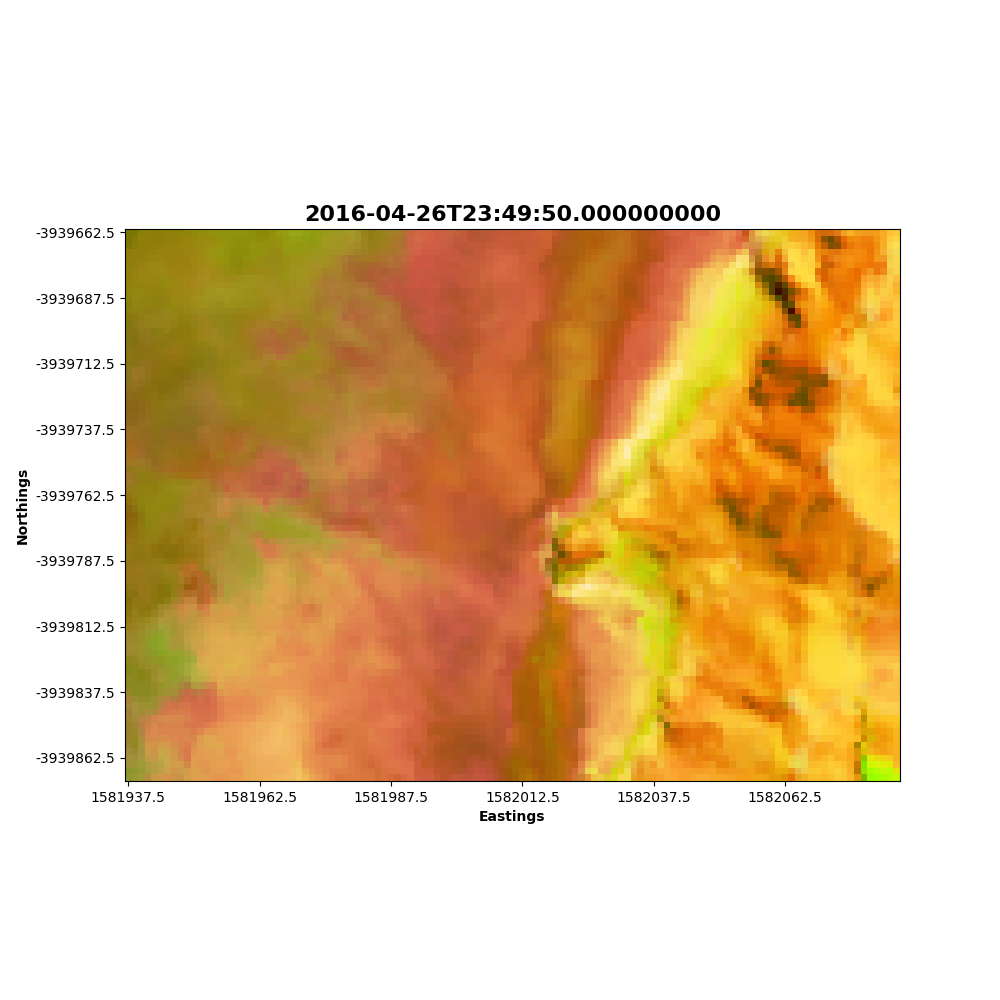

In [15]:
DEAPlotting.three_band_image(data, ['swir1','nir','green'])

# Export the three bands to Geotiff using our imported function

In [17]:
DEADataHandling.dataset_to_geotiff('LakeGeorge.tif', data.squeeze())